# 프로젝트 실습 #2: 용해 탱크

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## 1. 데이터 불러오기

In [2]:
df = pd.read_csv('.././data/melting_tank.csv')
df.head()

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK


In [3]:
df.shape

(835200, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STD_DT       835200 non-null  object 
 1   NUM          835200 non-null  int64  
 2   MELT_TEMP    835200 non-null  int64  
 3   MOTORSPEED   835200 non-null  int64  
 4   MELT_WEIGHT  835200 non-null  int64  
 5   INSP         835200 non-null  float64
 6   TAG          835200 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ MB


In [5]:
df.describe()

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
count,835200.000000,835200.000000,835200.000000,835200.000000,835200.000000
mean,417599.500000,509.200623,459.782865,582.962125,3.194853
std,241101.616752,128.277519,639.436413,1217.604433,0.011822
min,0.000000,308.000000,0.000000,0.000000,3.170000
25%,208799.750000,430.000000,119.000000,186.000000,3.190000
50%,417599.500000,469.000000,168.000000,383.000000,3.190000
75%,626399.250000,502.000000,218.000000,583.000000,3.200000
max,835199.000000,832.000000,1804.000000,55252.000000,3.230000


In [6]:
df['TAG'].value_counts()

OK    658133
NG    177067
Name: TAG, dtype: int64

## 2. Datetime 인덱스

In [7]:
df['STD_DT'] = pd.to_datetime(df['STD_DT'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('STD_DT')
df

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,,
2020-03-04 00:00:00,0,489,116,631,3.19,OK
2020-03-04 00:00:00,1,433,78,609,3.19,OK
2020-03-04 00:00:00,2,464,154,608,3.19,OK
2020-03-04 00:00:00,3,379,212,606,3.19,OK
2020-03-04 00:00:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...
2020-04-30 23:59:00,835195,755,1743,318,3.21,OK
2020-04-30 23:59:00,835196,385,206,317,3.19,OK
2020-04-30 23:59:00,835197,465,148,316,3.20,OK


## 4. EDA

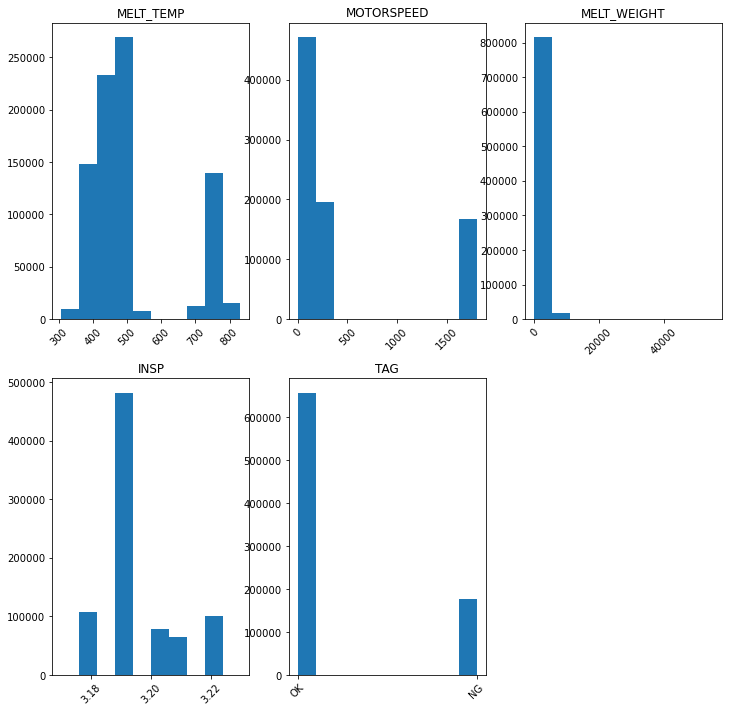

In [8]:
col_name = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG']

plt.figure(figsize=(12, 12))

for i in range(len(col_name)):
    num = 231+i
    
    plt.subplot(num)
    plt.hist(df[col_name[i]])
    plt.xticks(rotation=45)
    plt.title(col_name[i])

plt.show()

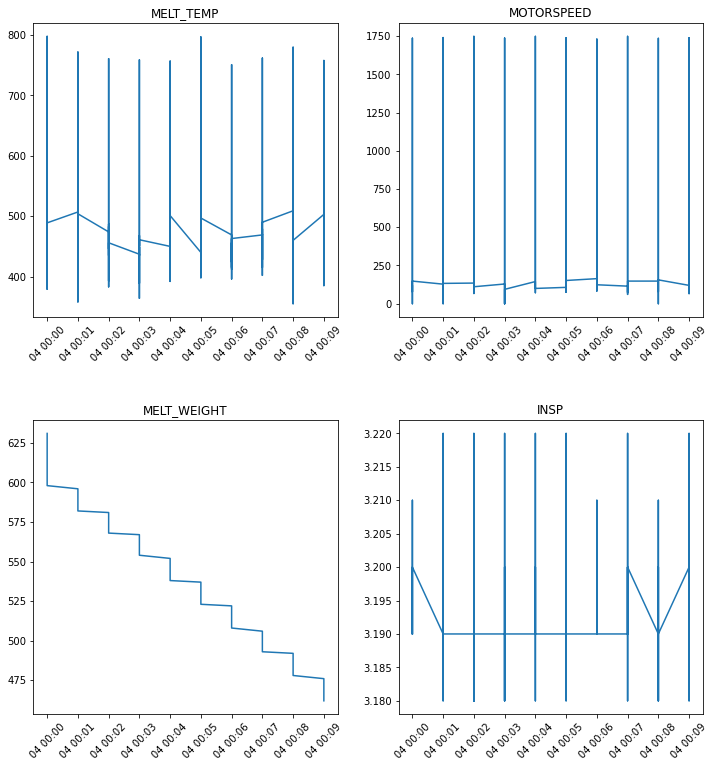

In [9]:
col_name = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP']

plt.figure(figsize=(12, 12))

for i in range(len(col_name)):
    num = 221+i
    plt.subplot(num)
    plt.plot(df[col_name[i]][0:100])
    plt.xticks(rotation=45)
    plt.title(col_name[i])

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)  
plt.show()

## 5. 데이터 전처리

In [10]:
df['TAG'] = df['TAG'].map({'OK': 1, 
                           'NG': 0})
df['TAG'].value_counts()

1    658133
0    177067
Name: TAG, dtype: int64

In [11]:
df

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
STD_DT,,,,,,
2020-03-04 00:00:00,0,489,116,631,3.19,1
2020-03-04 00:00:00,1,433,78,609,3.19,1
2020-03-04 00:00:00,2,464,154,608,3.19,1
2020-03-04 00:00:00,3,379,212,606,3.19,1
2020-03-04 00:00:00,4,798,1736,604,3.21,1
...,...,...,...,...,...,...
2020-04-30 23:59:00,835195,755,1743,318,3.21,1
2020-04-30 23:59:00,835196,385,206,317,3.19,1
2020-04-30 23:59:00,835197,465,148,316,3.20,1


In [12]:
corr = df.corr(method = 'pearson') 
corr

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
NUM,1.000000,0.000188,-0.000050,0.080079,-0.000524,0.086698
MELT_TEMP,0.000188,1.000000,0.944929,-0.000336,0.916295,0.310586
MOTORSPEED,-0.000050,0.944929,1.000000,0.000123,0.887813,0.264693
MELT_WEIGHT,0.080079,-0.000336,0.000123,1.000000,-0.000005,-0.012084
INSP,-0.000524,0.916295,0.887813,-0.000005,1.000000,0.272580
TAG,0.086698,0.310586,0.264693,-0.012084,0.272580,1.000000


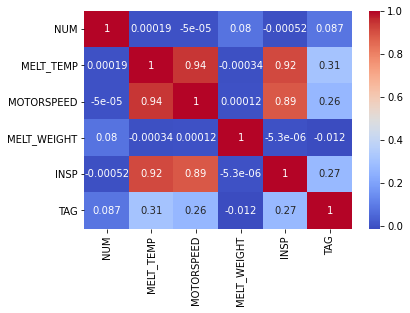

In [13]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## 6. Train/Test Split

In [14]:
from sklearn.model_selection import train_test_split

X = df[['MELT_TEMP', 'MOTORSPEED', 'INSP']]
y = df['TAG']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(584640, 3)
(250560, 3)
(584640,)
(250560,)


## 7. Supervised: XGB Classifier

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

xgb_pipeline = Pipeline([
    ('scale', MinMaxScaler()),
    ('xgb', XGBClassifier())
]).fit(X_train, y_train)
xgb_preds = xgb_pipeline.predict(X_test)

/Users/limkahyun/anaconda3/envs/sona/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:02:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

xgb_accuracy = accuracy_score(y_test, xgb_preds)

print("Accuracy:", xgb_accuracy)
print(classification_report(y_test, xgb_preds))

Accuracy: 0.7871527777777778
              precision    recall  f1-score   support

           0       0.43      0.00      0.01     53269
           1       0.79      1.00      0.88    197291

    accuracy                           0.79    250560
   macro avg       0.61      0.50      0.44    250560
weighted avg       0.71      0.79      0.70    250560



<Figure size 504x504 with 0 Axes>

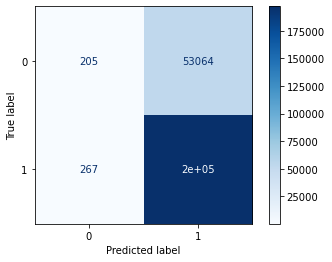

In [17]:
plt.figure(figsize=(7, 7))
plot_confusion_matrix(xgb_pipeline, X_test, y_test,
                      cmap=plt.cm.Blues)

plt.show()

## 7-2 Supervised + SMOTE 

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train , y_train)

In [19]:
xgb_pipeline = Pipeline([
    ('scale', MinMaxScaler()),
    ('xgb', XGBClassifier())
]).fit(X_train, y_train)
xgb_preds = xgb_pipeline.predict(X_test)

/Users/limkahyun/anaconda3/envs/sona/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:02:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [20]:
xgb_accuracy = accuracy_score(y_test, xgb_preds)

print("Accuracy:", xgb_accuracy)
print(classification_report(y_test, xgb_preds))

Accuracy: 0.6894516283524904
              precision    recall  f1-score   support

           0       0.39      0.82      0.53     53269
           1       0.93      0.65      0.77    197291

    accuracy                           0.69    250560
   macro avg       0.66      0.74      0.65    250560
weighted avg       0.82      0.69      0.72    250560



## 8. Supervised: LSTM + SMOTE

### 8-1 Input Dataset 만들기
`(data, window, features)` 

In [22]:
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    
    for i in range(len(data) - window_size):
        feature_list.append(data[i:i+window_size])
        label_list.append(label[i+window_size])
    
    return np.array(feature_list), np.array(label_list)

In [23]:
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [24]:
train_scaled

array([[0.27099237, 0.03603104, 0.33333333],
       [0.23282443, 0.04878049, 0.33333333],
       [0.29389313, 0.08980044, 0.33333333],
       ...,
       [0.38358779, 0.08813747, 0.33333333],
       [0.24045802, 0.07261641, 0.33333333],
       [0.1889313 , 0.03603104, 0.33333333]])

In [25]:
train_feature, train_label = make_dataset(train_scaled, y_train, 10)
test_feature, test_label = make_dataset(test_scaled, y_test, 10)

In [26]:
print(train_feature.shape)
print(train_label.shape)
print(test_feature.shape)
print(test_label.shape)

(921674, 10, 3)
(921674,)
(250550, 10, 3)
(250550,)


### 8-2 Train/Valid set Split

In [27]:
# train, validation set 생성
X_train, X_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.3)

X_train.shape, X_valid.shape

((645171, 10, 3), (276503, 10, 3))

### 8-3 Model Build

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing import sequence
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
model = Sequential()
model.add(LSTM(50, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='tanh', 
               return_sequences=False)
          )
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10800     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'],) 

early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=0, 
                             save_best_only=True, mode='auto')

### 8-4 LSTM 학습하기

In [ ]:
history = model.fit(X_train, y_train, 
                    epochs=200, 
                    batch_size=256,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
2521/2521 [==============================] - 27s 10ms/step - loss: 0.4274 - accuracy: 0.8246 - val_loss: 0.4191 - val_accuracy: 0.8288
Epoch 2/200
2521/2521 [==============================] - 26s 10ms/step - loss: 0.4146 - accuracy: 0.8322 - val_loss: 0.4152 - val_accuracy: 0.8297
Epoch 3/200
2521/2521 [==============================] - 27s 11ms/step - loss: 0.4128 - accuracy: 0.8327 - val_loss: 0.4188 - val_accuracy: 0.8313
Epoch 4/200
2521/2521 [==============================] - 26s 10ms/step - loss: 0.4110 - accuracy: 0.8333 - val_loss: 0.4105 - val_accuracy: 0.8321
Epoch 5/200
2521/2521 [==============================] - 26s 10ms/step - loss: 0.4083 - accuracy: 0.8338 - val_loss: 0.4133 - val_accuracy: 0.8313
Epoch 6/200
2521/2521 [==============================] - 27s 11ms/step - loss: 0.4068 - accuracy: 0.8341 - val_loss: 0.4096 - val_accuracy: 0.8321
Epoch 7/200
2521/2521 [==============================] - 25s 10ms/step - loss: 0.4055 - accuracy: 0.8345 - val_loss: 0

In [ ]:
model.evaluate(test_feature, test_label)

In [ ]:
model.load_weights(filename)
lstm_preds = model.predict_classes(test_feature)
lstm_preds

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

plt.show()

In [ ]:
_, accuracy = model.evaluate(test_feature, test_label)

print("Accuracy:", accuracy)
print(classification_report(test_label, lstm_preds))